In [1]:
import numpy as np
import pandas as pd

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(X, y), (X_test, y_test) = fashion_mnist.load_data()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)


In [3]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols)

In [51]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols)

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)
y_test.shape

(10000, 10)

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing import sequence
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


In [13]:

batch_size = 128
num_classes = 10
epochs = 2

row_hidden = 128
col_hidden = 128

row, col = X_train.shape[1:]


In [21]:
embedding_vecor_length = 32
model = Sequential()
model.add(InputLayer(input_shape=(row, col)))
model.add(Conv1D( filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
# model.add(LSTM(100))
# model.add(LSTM(row_hidden, return_sequences = True))
model.add(Bidirectional(LSTM(row_hidden, return_sequences = True)))
model.add(LSTM(col_hidden))
# model.add(Dense(1, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 28, 32)            2720      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 14, 32)            0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 14, 256)           164864    
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 365,994
Trainable params: 365,994
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/2
375/375 [==============================] - 13s 27ms/step - loss: 0.6553 - accuracy: 0.7566 - val_loss: 0.4708 - val_accuracy: 0.8263
Epoch 2/2
375/375 [==============================] - 9s 25ms/step - loss: 0.4320 - accuracy: 0.8391 - val_loss: 0.4118 - val_accuracy: 0.8464


In [23]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.41747631063461305
Test accuracy: 0.8403


In [24]:
model.predict(X_test)

array([[1.27215180e-04, 2.36790564e-04, 5.17258275e-04, ...,
        1.71910453e-02, 3.72411996e-04, 9.55190346e-01],
       [2.41774062e-03, 5.56369973e-03, 7.81365862e-01, ...,
        7.81396007e-05, 1.99361367e-03, 6.14229515e-04],
       [4.70098983e-04, 9.97328979e-01, 9.43380491e-05, ...,
        2.23075083e-04, 1.06276472e-04, 9.46687121e-05],
       ...,
       [1.86848840e-03, 7.54887662e-05, 4.00981290e-04, ...,
        4.40402329e-04, 9.93561232e-01, 9.55648700e-05],
       [4.52185121e-04, 9.90356500e-01, 3.28732837e-04, ...,
        4.12790542e-04, 4.10923035e-04, 4.59031744e-04],
       [3.39804162e-04, 1.08750958e-04, 1.92336006e-04, ...,
        5.51964841e-02, 2.84602148e-03, 2.54559701e-03]])

In [53]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, TimeDistributed
from tensorflow.keras.layers import LSTM, Bidirectional, Conv1D, concatenate, Permute, Dropout

batch_size = 128
num_classes = 10
epochs = 2

row_hidden = 128
col_hidden = 128

row, col = X_train.shape[1:]

input = Input(shape=(row, col))

def lstm_pipe(in_layer):
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(in_layer)
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(x)
    encoded_rows = Bidirectional(LSTM(row_hidden, return_sequences = True))(x)
    return LSTM(col_hidden)(encoded_rows)
# read it by rows
first_read = lstm_pipe(input)
# read it by columns
trans_read = lstm_pipe(Permute(dims = (1,2))(input))
encoded_columns = concatenate([first_read, trans_read])
encoded_columns = Dropout(0.2)(encoded_columns)
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(input, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

ValueError: too many values to unpack (expected 2)

In [28]:
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/2
375/375 [==============================] - 45s 103ms/step - loss: 0.5844 - accuracy: 0.7841 - val_loss: 0.4277 - val_accuracy: 0.8412
Epoch 2/2
375/375 [==============================] - 37s 99ms/step - loss: 0.3944 - accuracy: 0.8561 - val_loss: 0.3838 - val_accuracy: 0.8594


In [30]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3952642009496689
Test accuracy: 0.8535


In [41]:
from tensorflow.keras.layers import ConvLSTM2D

In [81]:
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
import numpy as np

img_width, img_height = 28, 28
channels=1
input_shape = (img_width, img_height, channels)
batch_size = 8

model = Sequential()
model.add(Reshape((1,) + input_shape, input_shape=input_shape))
model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3),
                     activation='relu',
                     return_sequences=True,
                     padding='same',
                     input_shape=(None, img_width, img_height, channels)))
model.add(BatchNormalization())
model.add(ConvLSTM2D(10, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

fake_picture = np.random.rand(*((batch_size,) + input_shape)).astype(np.float32)
model(fake_picture)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_18 (Reshape)         (None, 1, 28, 28, 1)      0         
_________________________________________________________________
conv_lst_m2d_20 (ConvLSTM2D) (None, 1, 28, 28, 8)      2624      
_________________________________________________________________
batch_normalization_9 (Batch (None, 1, 28, 28, 8)      32        
_________________________________________________________________
conv_lst_m2d_21 (ConvLSTM2D) (None, 28, 28, 10)        6520      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

<tf.Tensor: shape=(8, 10), dtype=float64, numpy=
array([[0.10030874, 0.10020405, 0.09998551, 0.10012555, 0.09982402,
        0.10002077, 0.09999278, 0.10016399, 0.09939686, 0.09997772],
       [0.10027985, 0.10001056, 0.1000442 , 0.10011401, 0.0998605 ,
        0.10001344, 0.09997553, 0.10015137, 0.09947745, 0.10007308],
       [0.1001572 , 0.10015505, 0.09987595, 0.09990805, 0.09984163,
        0.10002672, 0.10025749, 0.10024177, 0.0993303 , 0.10020583],
       [0.10030406, 0.10022779, 0.09994106, 0.10000626, 0.09984721,
        0.10002684, 0.10012706, 0.10008898, 0.09938771, 0.10004302],
       [0.10020745, 0.10016219, 0.09992776, 0.10002901, 0.09984393,
        0.10005222, 0.10009301, 0.10020543, 0.0993995 , 0.10007951],
       [0.10031471, 0.10001338, 0.10001156, 0.10004745, 0.09990501,
        0.10004564, 0.10003238, 0.10007351, 0.09946491, 0.10009145],
       [0.1001649 , 0.10021419, 0.09998246, 0.09994947, 0.09984486,
        0.09994373, 0.1001482 , 0.10003109, 0.09961965, 0.100

In [82]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,channels)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols,channels)

In [88]:
batch_size=124
epochs=10
history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(X_val, y_val))

Epoch 1/10
388/388 [==============================] - 17s 44ms/step - loss: 0.8256 - accuracy: 0.6800 - val_loss: 0.4008 - val_accuracy: 0.8777
Epoch 2/10
388/388 [==============================] - 17s 44ms/step - loss: 0.8219 - accuracy: 0.6816 - val_loss: 0.3881 - val_accuracy: 0.8819
Epoch 3/10
388/388 [==============================] - 17s 45ms/step - loss: 0.8113 - accuracy: 0.6835 - val_loss: 0.3939 - val_accuracy: 0.8799
Epoch 4/10
388/388 [==============================] - 17s 45ms/step - loss: 0.8038 - accuracy: 0.6902 - val_loss: 0.3793 - val_accuracy: 0.8747
Epoch 5/10
388/388 [==============================] - 17s 45ms/step - loss: 0.7992 - accuracy: 0.6926 - val_loss: 0.3842 - val_accuracy: 0.8824
Epoch 6/10
388/388 [==============================] - 17s 45ms/step - loss: 0.7973 - accuracy: 0.6907 - val_loss: 0.3916 - val_accuracy: 0.8761
Epoch 7/10
388/388 [==============================] - 17s 45ms/step - loss: 0.7767 - accuracy: 0.7017 - val_loss: 0.3719 - val_accuracy:

In [84]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3927120571613312
Test accuracy: 0.8686


In [85]:
scores

[0.3927120571613312, 0.8686]

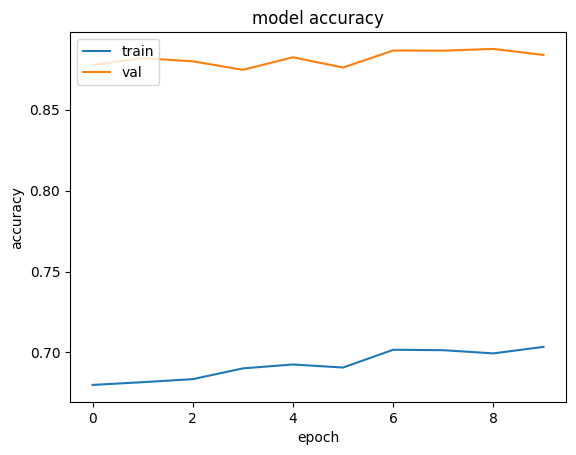

In [89]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()